All laboratory assignments and homework will be evaluated based on three key criteria:

1. **Accuracy of Python Code**: Your Python code submissions must be precise and correct.

2. **Clarity and Organization of Jupyter Notebook**: 

- Ensure that your Jupyter notebook is well-structured and neatly organized. 
- Each Python code snippet should be supplemented with appropriate comments using either the "#" symbol or Markdown text.

3. **Effective Presentation of Outputs**: Within your Jupyter notebook, make sure all outputs are clearly visible. If necessary, provide explanations for these outputs using Markdown annotations. However, **avoid displaying entire output blocks; instead, display only the initial two to five rows for clarity**.

Additionally, all submissions must adhere to the following formatting requirements:

- Inclusion of K-State Honor Code: Each laboratory assignment and homework must contain the K-State Honor Code statement: ```"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."```

- Academic Honesty and Consequences: Breach of academic honesty can result in a grade of XF, where "F" indicates failure in the course, and "X" indicates an Honor Pledge violation. Detailed information can be found at this link: http://www.k-state.edu/provost/resources/teaching/course.htm

It's important to note the following prohibitions:

- **Unauthorized Collaboration**: Collaborating with other students on laboratory assignments, homework, the midterm exam, or the final project is strictly prohibited.

- **Unauthorized Aid**: Sharing your code with other students or receiving code from others is considered unauthorized aid and is not allowed.

Adherence to these guidelines will ensure a fair and respectful learning environment and help maintain academic integrity.

**K-State Honor Code**

> "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."



**Your Name:** 

> Bhaskar Aryal

In [1]:
#import packages (including linear_model)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

#model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


pd.set_option('display.float_format', '{:.2f}'.format)


# Task 1: Data Import

## A.	Load the dataset into a pandas DataFrame.

In [2]:
# Read the data set from a csv file 
df = pd.read_csv("data/finance.csv")

# Inspect the first five rows of the data
df.head()

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,GDP_Growth,Sector,Exchange,Rating,Stock_Price
0,27.44,1.56,1.03,10120.68,1279001.12,5.62,0.47,15.86,1.41,3.13,1.63,Consumer,AMEX,BB,90.85
1,21.44,2.34,0.85,9914.20,851882.99,4.61,0.72,15.86,1.82,2.10,2.40,Technology,NYSE,AA,92.65
2,15.25,1.86,1.00,10842.40,850352.01,3.19,0.33,11.97,1.80,2.84,2.84,Technology,AMEX,BBB,76.67
3,24.48,1.56,1.00,8654.20,966156.92,4.20,0.69,17.40,1.17,2.26,1.33,Finance,NASDAQ,BBB,89.50
4,13.47,2.33,1.07,9164.46,-977292.58,2.68,0.55,15.77,1.40,2.45,1.68,Consumer,NASDAQ,AAA,82.33


## B.	Perform a basic inspection to understand the dimensions, data types, and the first few rows of the dataset.

In [3]:
# Brief summary / quick overview of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PE_Ratio        1931 non-null   float64
 1   Dividend_Yield  1932 non-null   float64
 2   Beta            1931 non-null   float64
 3   Market_Cap      1932 non-null   float64
 4   Trading_Volume  1931 non-null   float64
 5   EPS             1971 non-null   float64
 6   Debt_to_Equity  1971 non-null   float64
 7   ROE             1971 non-null   float64
 8   Current_Ratio   1971 non-null   float64
 9   Interest_Rate   1971 non-null   float64
 10  GDP_Growth      1971 non-null   float64
 11  Sector          1931 non-null   object 
 12  Exchange        1931 non-null   object 
 13  Rating          1971 non-null   object 
 14  Stock_Price     1971 non-null   float64
dtypes: float64(12), object(3)
memory usage: 231.1+ KB


In [4]:
# Inspect the data type for each variable 
df.dtypes

PE_Ratio          float64
Dividend_Yield    float64
Beta              float64
Market_Cap        float64
Trading_Volume    float64
EPS               float64
Debt_to_Equity    float64
ROE               float64
Current_Ratio     float64
Interest_Rate     float64
GDP_Growth        float64
Sector             object
Exchange           object
Rating             object
Stock_Price       float64
dtype: object

In [5]:
# data dimensions 
df.shape

(1971, 15)

## C.	What variables are numerical? Categorical?

In [6]:
# Identify numerical and categorical columns
num_columns = df.select_dtypes(include=['int64', 'float64']).columns
cat_columns = df.select_dtypes(include=['object', 'bool']).columns

print(num_columns, cat_columns)

Index(['PE_Ratio', 'Dividend_Yield', 'Beta', 'Market_Cap', 'Trading_Volume',
       'EPS', 'Debt_to_Equity', 'ROE', 'Current_Ratio', 'Interest_Rate',
       'GDP_Growth', 'Stock_Price'],
      dtype='object') Index(['Sector', 'Exchange', 'Rating'], dtype='object')


#### Numerical Columns:
- PE_Ratio, Dividend_Yield, Beta, Market_Cap, Trading_Volume, EPS, Debt_to_Equity, RO, Current_Ratio, Interest_Rate, GDP_Growth and Stock_Price appear to be numerical variables. 

#### Categorical Columns:
- Sector, Exchange and Rating appear categorical variables.

# Task 2: Data Exploration

## A.	Use summary statistics and visualizations to understand the data distribution.

In [7]:
# Summary statistics
df.describe()  # this return summary statistics for numerical variables 

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,GDP_Growth,Stock_Price
count,1931.00,1932.00,1931.00,1932.00,1931.00,1971.00,1971.00,1971.00,1971.00,1971.00,1971.00,1971.00
mean,19.93,2.00,1.01,10853.91,1091460.84,5.00,0.50,15.10,1.51,2.02,2.00,96.22
std,5.00,0.50,0.20,9086.88,969942.61,1.00,0.10,2.96,0.19,0.50,0.49,10.69
min,3.52,0.35,0.38,4028.78,-977292.58,2.08,0.21,6.38,0.96,0.55,0.60,63.82
25%,16.60,1.66,0.87,8703.90,857869.17,4.30,0.44,13.07,1.37,1.69,1.68,88.91
50%,20.02,1.99,1.00,10030.86,1001225.74,5.01,0.50,15.06,1.50,2.02,1.99,96.19
75%,23.43,2.35,1.15,11358.64,1146446.94,5.69,0.57,17.10,1.64,2.38,2.33,103.41
max,35.19,3.54,1.67,147154.28,13954433.65,7.79,0.79,23.79,2.07,3.47,3.48,128.70


In [8]:
# Summary statistics for categorical variables 
df.describe(include = 'object')  # include = object performs summary explicity for categorical variables  

,Sector,Exchange,Rating
count,1931,1931,1971
unique,8,6,5
top,Healthcare,NYSE,A
freq,420,603,400


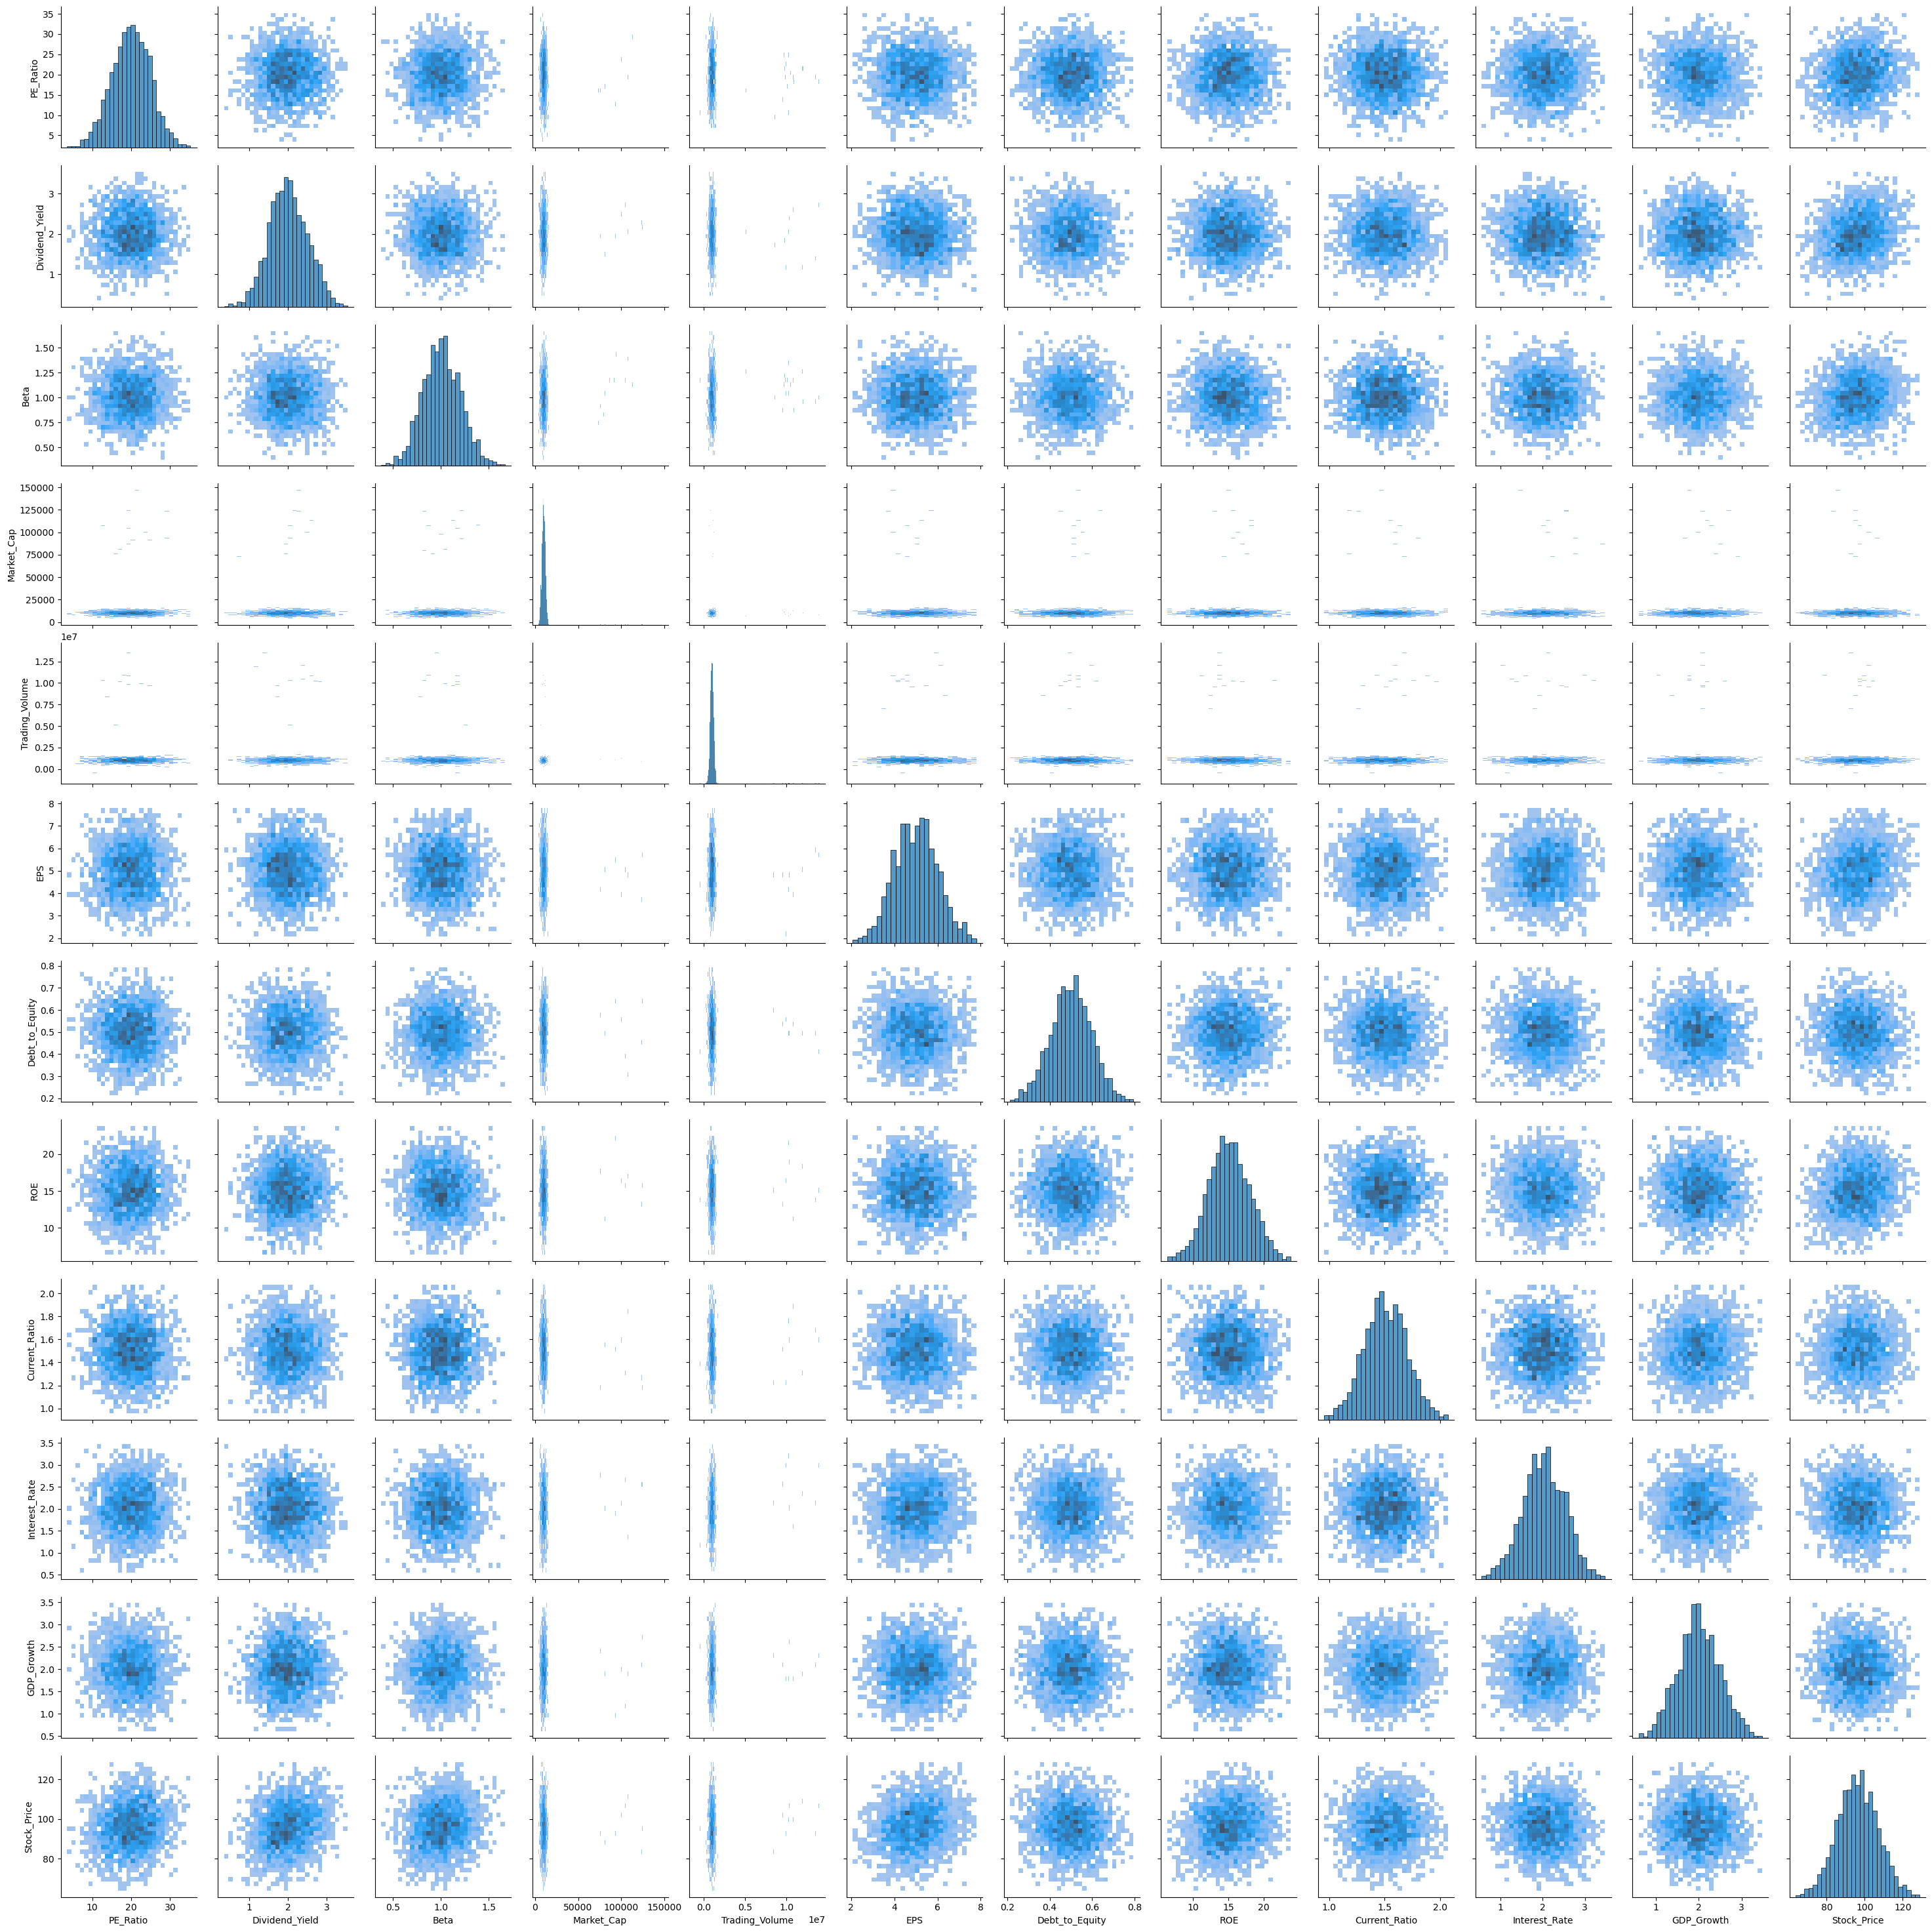

In [9]:
# Use seabon package's pairplot to visualize the relationship between the numerical variables 
sns.pairplot(df, kind = 'hist')

The pariplot, due to the presence to many variables is difficult to read. Hence, we will variables based on our domain knowledge and observe the relationship between them. 

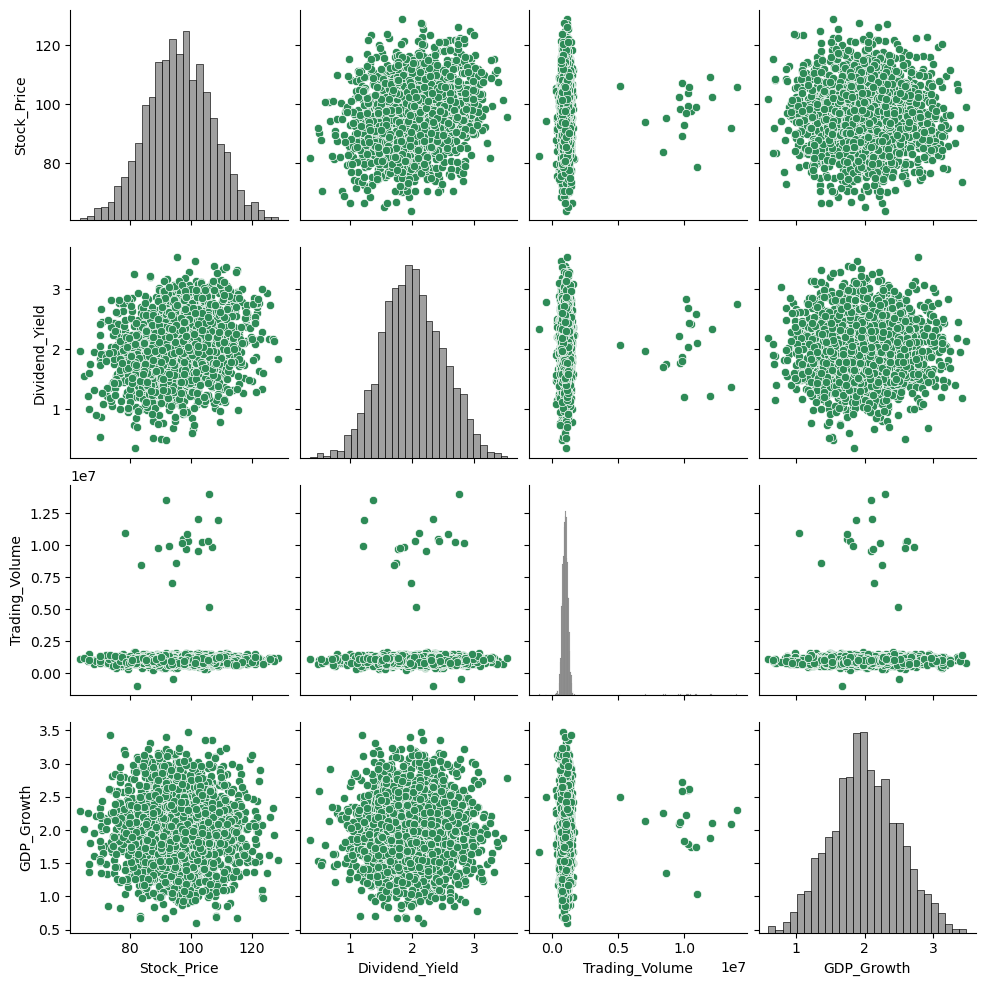

In [10]:
# lets examine the relationship a few choosen variables, variables that might be of greater interest 
sns.pairplot(data=df, 
             vars=['Stock_Price', 'Dividend_Yield', 'Trading_Volume', 'GDP_Growth'],
             plot_kws={'color': 'seagreen'},
             diag_kws={'color': 'gray'})

# alternatively categorizes the plots by diffetent sectors 
#sns.pairplot(data = df, vars = ['Stock_Price', 'Dividend_Yield', 'Trading_Volume', 'GDP_Growth'], hue = 'Sector')

#### Observation: 
- All the variables plotted are normally distributed; variability in trading volume is noticably smaller than the rest of the variables.

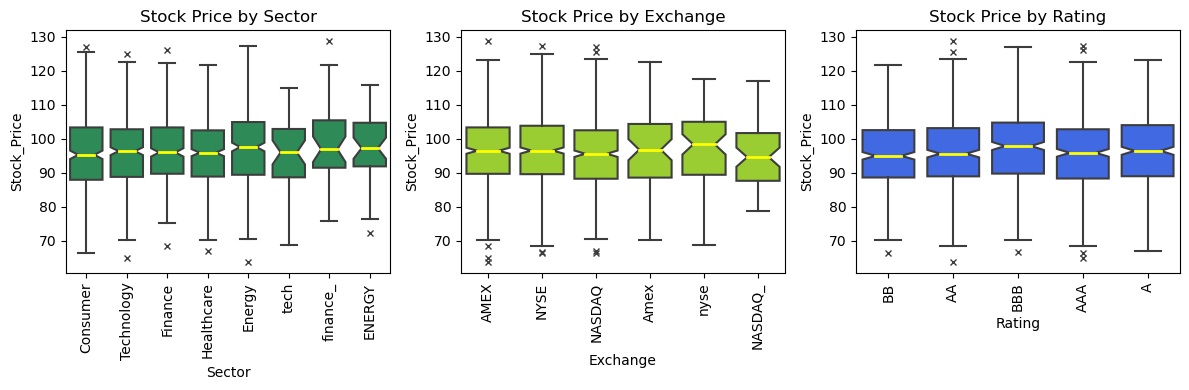

In [11]:
# Visualizing the categorical variables 
# Set up a matplotlib figure with three subplots (axes)
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 3 rows, 1 column, and setting the figure size

# Boxplot for 'Sector'
sns.boxplot(ax=axes[0], data=df, x="Sector", y="Stock_Price", notch=True,
            showcaps=True, flierprops={"marker": "x"},
            medianprops={"color": "yellow", "linewidth": 2},
            boxprops={"facecolor": "seagreen"})
axes[0].set_title('Stock Price by Sector')
axes[0].tick_params(axis='x', rotation=90)

# Boxplot for 'Exchange'
sns.boxplot(ax=axes[1], data=df, x="Exchange", y="Stock_Price", notch=True,
            showcaps=True, flierprops={"marker": "x"},
            medianprops={"color": "yellow", "linewidth": 2},
           boxprops={"facecolor": "yellowgreen"})
axes[1].set_title('Stock Price by Exchange')
axes[1].tick_params(axis='x', rotation=90)

# Boxplot for 'Rating'
sns.boxplot(ax=axes[2], data=df, x="Rating", y="Stock_Price", notch=True,
            showcaps=True, flierprops={"marker": "x"},
            medianprops={"color": "yellow", "linewidth": 2},
           boxprops={"facecolor": "royalblue"})
axes[2].set_title('Stock Price by Rating')
axes[2].tick_params(axis='x', rotation=90)

# djust the layout of the plots to fit nicely
plt.tight_layout()

# Show the plots
plt.show()

## B.	Identify any initial observations about data quality issues, such as missing values or out-liers (inaccurate / inconsistent values).

- Missing values
- Inconsistent/inaccurate values


In [12]:
# Missing values in each column 
df.isnull().sum()

PE_Ratio          40
Dividend_Yield    39
Beta              40
Market_Cap        39
Trading_Volume    40
EPS                0
Debt_to_Equity     0
ROE                0
Current_Ratio      0
Interest_Rate      0
GDP_Growth         0
Sector            40
Exchange          40
Rating             0
Stock_Price        0
dtype: int64

In [13]:
# Inconsistent or inaccurate values 
df.describe()

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,GDP_Growth,Stock_Price
count,1931.00,1932.00,1931.00,1932.00,1931.00,1971.00,1971.00,1971.00,1971.00,1971.00,1971.00,1971.00
mean,19.93,2.00,1.01,10853.91,1091460.84,5.00,0.50,15.10,1.51,2.02,2.00,96.22
std,5.00,0.50,0.20,9086.88,969942.61,1.00,0.10,2.96,0.19,0.50,0.49,10.69
min,3.52,0.35,0.38,4028.78,-977292.58,2.08,0.21,6.38,0.96,0.55,0.60,63.82
25%,16.60,1.66,0.87,8703.90,857869.17,4.30,0.44,13.07,1.37,1.69,1.68,88.91
50%,20.02,1.99,1.00,10030.86,1001225.74,5.01,0.50,15.06,1.50,2.02,1.99,96.19
75%,23.43,2.35,1.15,11358.64,1146446.94,5.69,0.57,17.10,1.64,2.38,2.33,103.41
max,35.19,3.54,1.67,147154.28,13954433.65,7.79,0.79,23.79,2.07,3.47,3.48,128.70


- Trading_Volume has a negative minimum value which seems to be inaccurate. Rest of the numerical columns look fine. 

In [14]:
# Inconsistent value in categorical columns 
# Sector 
df['Sector'].unique()

array(['Consumer', 'Technology', 'Finance', 'Healthcare', 'Energy',
       'tech', 'finance_', nan, 'ENERGY'], dtype=object)

- Technology, Finance and Energy have duplicate misonomers. These need to be corrected. There is a Nan value too. 

In [15]:
# Inconsistent value in categorical columns 
# Sector 
df['Exchange'].unique()

array(['AMEX', 'NYSE', 'NASDAQ', 'Amex', 'nyse', 'NASDAQ_', nan],
      dtype=object)

- Likewise, AMEX and NYSE and NASDAQ have mispelled typos or case mismatch duplicates. 

In [16]:
# Inconsistent value in categorical columns 
# Sector 
df['Rating'].unique()

array(['BB', 'AA', 'BBB', 'AAA', 'A'], dtype=object)

- No issues identified with Rating variable

# Task 3: Data Cleaning 

## A.	Handle missing values. Remove rows containing missing values.

#### Handling Missing Values: 
Out of different ways to handle missing values, I choose to drop all the rows that contain missing values and proceed with the analysis. Two reasons why I choose to remove the missing values are: 
- Injecting mean/median values may sometimes lead to inaccurate analyses as they my introduce bias in the dataset
- Given the length of the data, I belive, dropping the rows with missing data will have negligible imapact on model metrics 

In [17]:
# drop rows with missing values 
df = df.dropna()

# verify the missing values 
df.isnull().sum()

PE_Ratio          0
Dividend_Yield    0
Beta              0
Market_Cap        0
Trading_Volume    0
EPS               0
Debt_to_Equity    0
ROE               0
Current_Ratio     0
Interest_Rate     0
GDP_Growth        0
Sector            0
Exchange          0
Rating            0
Stock_Price       0
dtype: int64

In [18]:
# check the total missing valus in the dataset 
df.isnull().sum().sum()

0

## B.	Identify and handle inaccurate values/outliers (e.g., negative values) in numerical columns. 

We identified a negative minimum value in the Trading_volume in our summary statistics above. A negative value for Trading_Volume is inaccurate. We will look for all the negative values for this variable and replace it with NANs. 

In [19]:
# identifying all the negative values in trading volume
df[df['Trading_Volume'] < 0]

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,GDP_Growth,Sector,Exchange,Rating,Stock_Price
4,13.47,2.33,1.07,9164.46,-977292.58,2.68,0.55,15.77,1.40,2.45,1.68,Consumer,NASDAQ,AAA,82.33
765,10.18,2.78,1.16,11284.31,-462650.47,4.44,0.41,13.88,1.41,1.14,2.50,Finance,NYSE,AAA,94.21


In [20]:
# replace negative values wiht NAns 
df.loc[df['Trading_Volume'] < 0, 'Trading_Volume'] = np.nan

# alternatively 
#df['Trading_Volume'] = df['Trading_Volume'].where(lambda x: x>0, np.nan)

In [21]:
# Check if there are negative values again 
df[df['Trading_Volume'] < 0]

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,GDP_Growth,Sector,Exchange,Rating,Stock_Price


## C.	Correct any inconsistencies in categorical columns, such as varying capitalization or ty-pos.

In [22]:
# replace the typos for Technology, Finance and Energy in Sector column 
df = df.replace({'tech': 'Technology', 'finance_': 'Finance', 'ENERGY': 'Energy'})
df['Sector'].unique()

array(['Consumer', 'Technology', 'Finance', 'Healthcare', 'Energy'],
      dtype=object)

In [23]:
df['Exchange'].unique()

array(['AMEX', 'NYSE', 'NASDAQ', 'Amex', 'nyse', 'NASDAQ_'], dtype=object)

In [24]:
# replace typos in Exchange column 
df = df.replace({'Amex': 'AMEX', 'nyse': 'NYSE', 'NASDAQ_': 'NASDAQ'})
df['Exchange'].unique()

array(['AMEX', 'NYSE', 'NASDAQ'], dtype=object)

# Task 4: Correlation Analysis

**Note**: We don't want to make any further changes to ```df```. To conduct correlation analysis, it's recommended to create a copy of the original dataframe (```df_corr```) and convert categorical columns to dummy variables. 

In [25]:
df_corr = df.copy()

In [26]:
df_corr = pd.get_dummies(df_corr, columns=['Sector', 'Exchange', 'Rating'])

In [27]:
df_corr.head()

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,...,Sector_Healthcare,Sector_Technology,Exchange_AMEX,Exchange_NASDAQ,Exchange_NYSE,Rating_A,Rating_AA,Rating_AAA,Rating_BB,Rating_BBB
0,27.44,1.56,1.03,10120.68,1279001.12,5.62,0.47,15.86,1.41,3.13,...,False,False,True,False,False,False,False,False,True,False
1,21.44,2.34,0.85,9914.20,851882.99,4.61,0.72,15.86,1.82,2.10,...,False,True,False,False,True,False,True,False,False,False
2,15.25,1.86,1.00,10842.40,850352.01,3.19,0.33,11.97,1.80,2.84,...,False,True,True,False,False,False,False,False,False,True
3,24.48,1.56,1.00,8654.20,966156.92,4.20,0.69,17.40,1.17,2.26,...,False,False,False,True,False,False,False,False,False,True
4,13.47,2.33,1.07,9164.46,NaN,2.68,0.55,15.77,1.40,2.45,...,False,False,False,True,False,False,False,True,False,False


## A.	Calculate the correlation matrix between the features and the target variable.

In [28]:
# correlation analysis 
df_corr.corr(numeric_only=True)['Stock_Price'].sort_values(ascending=False)

Stock_Price          1.00
Dividend_Yield       0.23
EPS                  0.20
Beta                 0.16
PE_Ratio             0.14
ROE                  0.13
Sector_Energy        0.06
Rating_BBB           0.06
Current_Ratio        0.04
Exchange_NYSE        0.03
Exchange_AMEX        0.03
Sector_Finance       0.03
Rating_A             0.03
Market_Cap           0.01
Trading_Volume       0.01
Sector_Technology   -0.01
GDP_Growth          -0.02
Rating_BB           -0.02
Rating_AAA          -0.03
Rating_AA           -0.03
Sector_Healthcare   -0.04
Sector_Consumer     -0.04
Exchange_NASDAQ     -0.06
Interest_Rate       -0.07
Debt_to_Equity      -0.09
Name: Stock_Price, dtype: float64

## B.	Create visualizations like heatmaps to better understand these correlations.

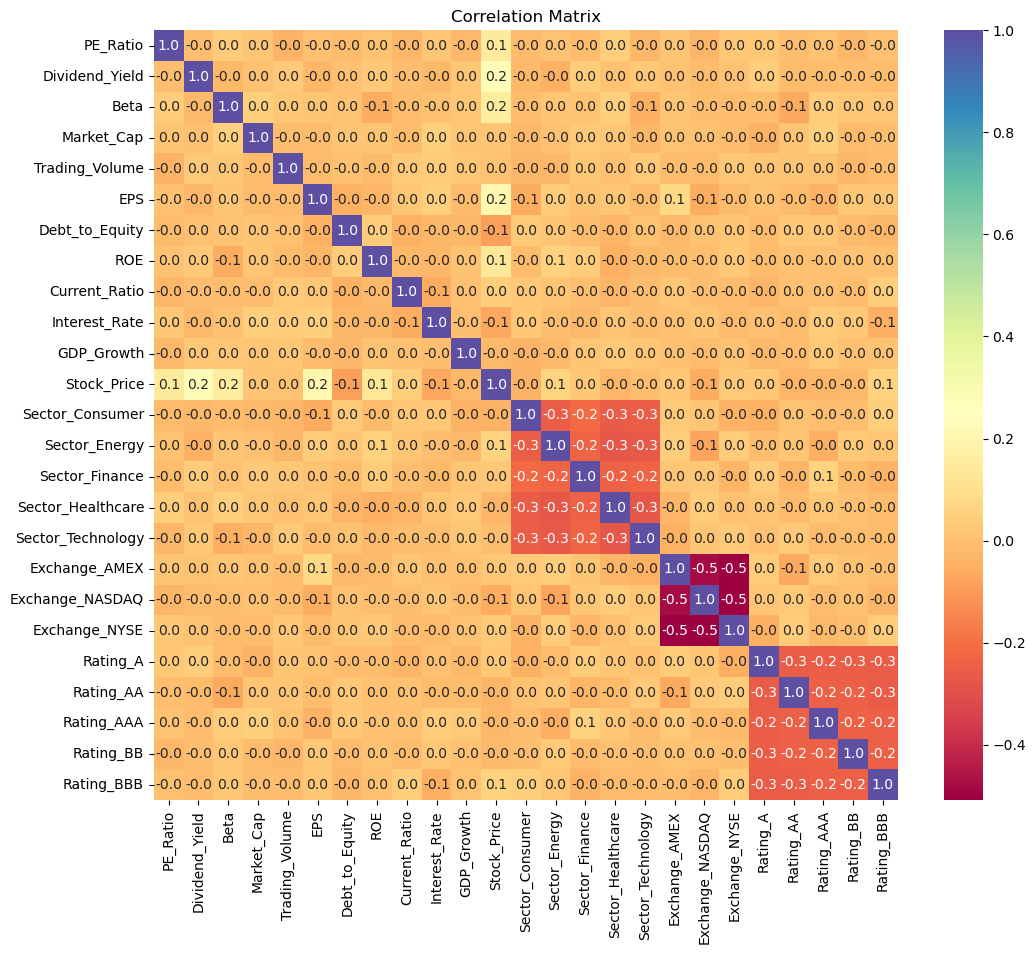

In [29]:
# correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), cmap = 'Spectral', annot = True, fmt = '.1f')
plt.title("Correlation Matrix")
plt.show()

## C.	Discuss your findings and identify which features are most strongly correlated with the stock price.

#### Findings from the Correlation Matrix: 
- Dividend_Yield, EPS (Earnings Per Share) and Beta are the top three variables with relatively stronger positive correlation with stock price
- Debt_to_Equity has a negative correlation (-0.09) with stock price; it could indicate that higher level of debts relative to equity is precieved as riskier and not desireable.
- The correlation magnitudes are relatively weak, hence we might need to do a statistical test to actually determine if these correlations are significant or just random. 

# Task 5: Data Splitting (and Data Preprocessing, if necessary)

To perform split validation and prepare data for model building, you can use the ```df``` tool for data processing.

## A.	Split the dataset into training and validation sets. Ensure that both sets are representa-tive of the overall dataset.

In [30]:
# Set X features and y variable
X = df.drop('Stock_Price', axis=1)
y = df['Stock_Price']

In [31]:
# Splitting the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1363, 14), (341, 14), (1363,), (341,))

## B.	Perform data preprocessing (e.g., encoding, standardizing) for model building if necessary. Explain why you did or did not choose to do data preprocessing.

To decide if the data needs standarization, we will check the predictors columns:

In [32]:
# Define numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).drop(columns=['Stock_Price']).columns
cat_cols = df.select_dtypes(include=[object]).columns   

print(num_cols, cat_cols)
# this approach is fast

Index(['PE_Ratio', 'Dividend_Yield', 'Beta', 'Market_Cap', 'Trading_Volume',
       'EPS', 'Debt_to_Equity', 'ROE', 'Current_Ratio', 'Interest_Rate',
       'GDP_Growth'],
      dtype='object') Index(['Sector', 'Exchange', 'Rating'], dtype='object')


In [33]:
X_train[num_cols].head(2)

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,GDP_Growth
439,24.07,1.13,0.95,10901.66,1150923.57,3.75,0.33,12.38,1.58,1.37,1.42
1351,25.53,1.91,1.05,7478.89,617937.08,6.28,0.46,14.52,1.24,2.26,1.75


In [34]:
# Impute missing values in numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
X_train_num = num_imputer.fit_transform(X_train[num_cols])
X_test_num = num_imputer.transform(X_test[num_cols])

# Impute missing values in categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat_imputed = cat_imputer.fit_transform(X_train[cat_cols])
X_test_cat_imputed = cat_imputer.transform(X_test[cat_cols])

The features/predictors have different units or scales. For instance Trading_Volume is in hundred thousands whereas Dividend_Yield is in ones. Hence, to make them comparable, we will standarize the data

### Standarize Numerical Column

In [35]:
# Standarize the predictors 
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [36]:
# Check after standarization 
pd.DataFrame(X_train_num_scaled).head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.87,-1.77,-0.27,-0.01,0.06,-1.24,-1.68,-0.92,0.40,-1.31,-1.16
1,1.16,-0.18,0.23,-0.37,-0.49,1.24,-0.39,-0.20,-1.38,0.49,-0.48


In [37]:
# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_cat_encoded = encoder.fit_transform(X_train_cat_imputed).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat_imputed).toarray()

#### Combine the Numerical and Categorical Columns 

Combine the preprocessed numerical and categorical columns back into a single dataset for both training and testing sets.

In [38]:
# Convert the scaled numerical features back to a DataFrame
X_train_num_df = pd.DataFrame(X_train_num_scaled, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_scaled, columns=num_cols, index=X_test.index)

# Convert the encoded categorical features back to a DataFrame
# Get the new column names from the OneHotEncoder
cat_cols_encoded = encoder.get_feature_names_out(cat_cols)
X_train_cat_df = pd.DataFrame(X_train_cat_encoded, columns=cat_cols_encoded, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat_encoded, columns=cat_cols_encoded, index=X_test.index)

In [39]:
# Check the encoded categorical columns 
cat_cols_encoded 

array(['Sector_Energy', 'Sector_Finance', 'Sector_Healthcare',
       'Sector_Technology', 'Exchange_NASDAQ', 'Exchange_NYSE',
       'Rating_AA', 'Rating_AAA', 'Rating_BB', 'Rating_BBB'], dtype=object)

In [40]:
# Concatenate the numerical and categorical DataFrames
X_train_preprocessed = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_preprocessed = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

In [41]:
# Check the concat training data 
X_train_preprocessed.head(2)

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,...,Sector_Energy,Sector_Finance,Sector_Healthcare,Sector_Technology,Exchange_NASDAQ,Exchange_NYSE,Rating_AA,Rating_AAA,Rating_BB,Rating_BBB
439,0.87,-1.77,-0.27,-0.01,0.06,-1.24,-1.68,-0.92,0.40,-1.31,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1351,1.16,-0.18,0.23,-0.37,-0.49,1.24,-0.39,-0.20,-1.38,0.49,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [42]:
# Check the concat test data 
X_test_preprocessed.head(2)

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,...,Sector_Energy,Sector_Finance,Sector_Healthcare,Sector_Technology,Exchange_NASDAQ,Exchange_NYSE,Rating_AA,Rating_AAA,Rating_BB,Rating_BBB
1198,-2.06,-1.04,-1.29,0.53,-0.14,0.14,1.37,0.41,1.29,-0.01,...,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1503,2.21,0.27,0.31,-0.37,-0.20,1.02,-0.72,-0.58,-0.05,0.11,...,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00


# Task 6: Model Building

## A.	Train multiple regression models
•	Linear Regression and Random Forest


#### Multiple Linear Regression 

In [43]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_preprocessed, y_train)

LinearRegression()

In [44]:
# Prediction with the model 
model_linear_regression_y = model_linear_regression.predict(X_test_preprocessed)

In [45]:
# Coefficients
coefficients = pd.DataFrame(model_linear_regression.coef_, index=X_train_preprocessed.columns, columns=['Coefficient'])
#print(coefficients)

In [46]:
pd.DataFrame(list(zip(X.columns, np.transpose(model_linear_regression.coef_)))).round(2)

,0,1
0,PE_Ratio,1.45
1,Dividend_Yield,2.28
2,Beta,1.72
3,Market_Cap,0.11
4,Trading_Volume,0.27
5,EPS,2.23
6,Debt_to_Equity,-0.85
7,ROE,1.47
8,Current_Ratio,0.36
9,Interest_Rate,-0.95


#### Random Forest Regressor

In [47]:
# Model Building 
regr = RandomForestRegressor(random_state = 0)
regr.fit(X_train_preprocessed, y_train)
regr_predicted = regr.predict(X_test_preprocessed)

In [48]:
# Feature Importance 
feature_importances = pd.DataFrame(regr.feature_importances_, index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Dividend_Yield,0.12
EPS,0.12
Beta,0.10
ROE,0.09
PE_Ratio,0.09
Interest_Rate,0.08
Debt_to_Equity,0.07
Current_Ratio,0.07
Trading_Volume,0.07
GDP_Growth,0.07


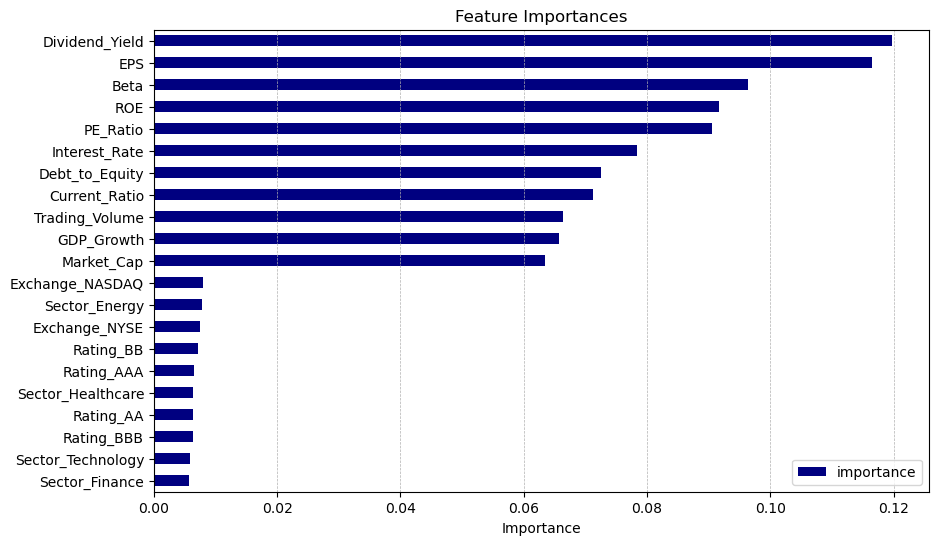

In [49]:
#Create a figure object with a specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Sort values in ascending order 
sorted_features = feature_importances.sort_values(by='importance', ascending=True)

# Use the axis 'ax' for plotting
sorted_features.plot(kind='barh', color='navy', ax=ax)

ax.set_xlabel('Importance')  # Label for the x-axis
ax.set_title('Feature Importances')  # Title of the plot
ax.grid(axis='x', linestyle='--', linewidth=0.5)  # Add a grid for the x-axis

plt.show()  # Display the plot

## B.	Train regression models using advanced methods 
- One feature selection technique 
- One regularized algorithm (Lasso)

#### Feature Selection 

In [50]:
# We use f_regression to identify the three most importatn features 
X_new = SelectKBest(f_regression, k=3).fit_transform(X_train_preprocessed, y_train)
X_new

array([[-1.76886863, -0.27308982, -1.24314946],
       [-0.18276355,  0.23227916,  1.2413014 ],
       [-1.10699979, -0.18348496, -0.3688415 ],
       ...,
       [-0.0953603 ,  1.10278881,  1.21446464],
       [-0.62311777, -0.4808862 ,  0.55485136],
       [ 1.59740814,  1.64578813, -1.45074981]])

In [51]:
# Identifyng the three columns 
selector = SelectKBest(f_regression, k=3).fit(X_train_preprocessed, y_train)
idxs_selected = selector.get_support(indices=True)
print(idxs_selected)

[1 2 5]


In [52]:
X_train_preprocessed.head(2)

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,...,Sector_Energy,Sector_Finance,Sector_Healthcare,Sector_Technology,Exchange_NASDAQ,Exchange_NYSE,Rating_AA,Rating_AAA,Rating_BB,Rating_BBB
439,0.87,-1.77,-0.27,-0.01,0.06,-1.24,-1.68,-0.92,0.40,-1.31,...,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1351,1.16,-0.18,0.23,-0.37,-0.49,1.24,-0.39,-0.20,-1.38,0.49,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


##### Selected Features:
f_Regression determines Dividend_Yield, Beta, EPS as the most important features/predictors 

In [53]:
X_test_preprocessed.iloc[:, [1, 2, 5]].head(2)

,Dividend_Yield,Beta,EPS
1198,-1.04,-1.29,0.14
1503,0.27,0.31,1.02


In [54]:
# Building model with the selected features
model_feature = lm.LinearRegression()
model_feature.fit(X_train_preprocessed.iloc[:, [1, 2, 5]], y_train)
model_feature_y = model_feature.predict(X_test_preprocessed.iloc[:, [1, 2, 5]])

#### LASSO Regularization 

In [55]:
# Fit the model with LASSO regularization  

# Step 1, Initialize the algorithm of choice 
model_LASSO = lm.Lasso(alpha = 0.1)

# step 2. Use fit function --> the most important step 
model_LASSO.fit(X_train_preprocessed, y_train)

Lasso(alpha=0.1)

In [56]:
print('Coefficients: ', model_LASSO.coef_)
print("y-intercept ", model_LASSO.intercept_)

Coefficients:  [ 1.35124467  2.18708434  1.61642456  0.00617032  0.17589687  2.16677705
 -0.75842349  1.38100964  0.25918604 -0.87086469 -0.          0.69099392
  0.         -0.91870011  0.         -0.          0.         -0.
 -0.         -0.06546523  0.14672361]
y-intercept  96.4439717984645


In [57]:
pd.DataFrame(list(zip(X.columns, np.transpose(model_LASSO.coef_)))).round(2)

,0,1
0,PE_Ratio,1.35
1,Dividend_Yield,2.19
2,Beta,1.62
3,Market_Cap,0.01
4,Trading_Volume,0.18
5,EPS,2.17
6,Debt_to_Equity,-0.76
7,ROE,1.38
8,Current_Ratio,0.26
9,Interest_Rate,-0.87


In [58]:
# Make predictions with the LASSO model 
model_LASSO_y = model_LASSO.predict(X_test_preprocessed)

# Task 7: Model Evaluation

## A.	Use metrics like MSE and R-squared to evaluate the model performance on the test set.


#### Performance Evaluation of of Multiple Linear Regression 

In [59]:
print("mean square error: ", mean_squared_error(y_test, model_linear_regression_y))
print("variance or r-squared: ", explained_variance_score(y_test, model_linear_regression_y))

mean square error:  88.50753992355224
variance or r-squared:  0.19841455097713157


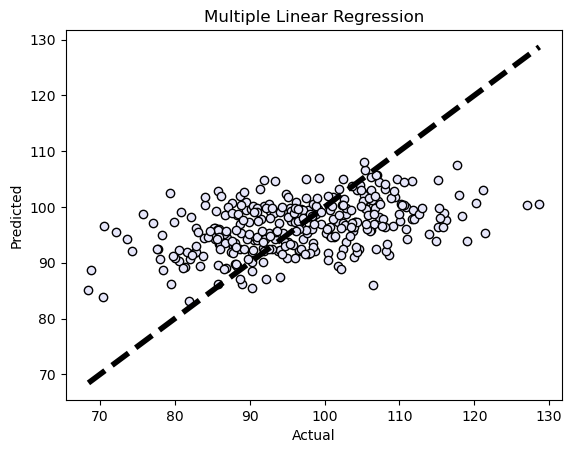

In [60]:
plt.subplots()
plt.scatter(y_test, model_linear_regression_y,
           facecolor = 'lavender', edgecolor = 'black')       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression')
plt.show()

#### Performance Evaluation of Random Forest Regressor 

In [61]:
print("mean square error: ", mean_squared_error(y_test, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, regr_predicted))

mean square error:  96.31935318925254
variance or r-squared:  0.12721171918498753


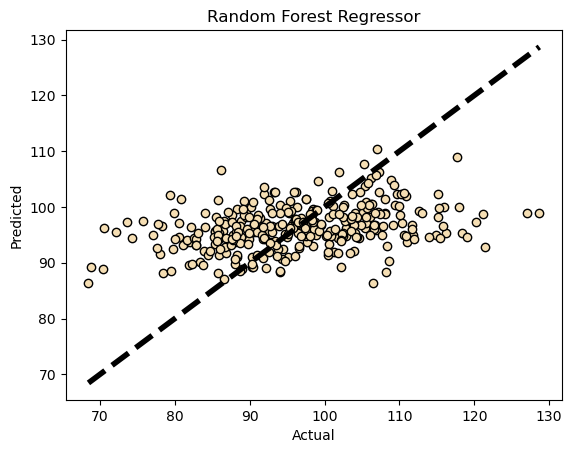

In [62]:
plt.subplots()
plt.scatter(y_test, regr_predicted,
           facecolor = 'wheat', edgecolor = 'black')       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

#### Performance of Feature selection Technique

In [63]:
# Model Evaluation
print("mean square error: ", mean_squared_error(y_test, model_feature_y))
print("variance or r-squared: ", explained_variance_score(y_test, model_feature_y))

mean square error:  94.08019673441106
variance or r-squared:  0.14750892983891728


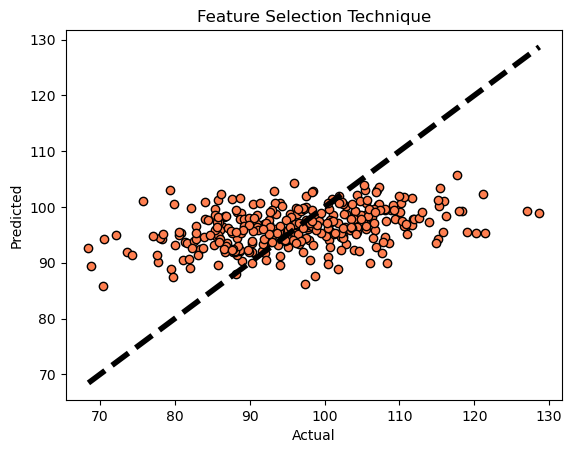

In [64]:
plt.subplots()
plt.scatter(y_test, model_feature_y,
           facecolor = 'coral', edgecolor = 'black')       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Feature Selection Technique')
plt.show()

#### Performance of LASSO

In [65]:
print("mean square error: ", mean_squared_error(y_test, model_LASSO_y))
print("variance or r-squared: ", explained_variance_score(y_test, model_LASSO_y))

mean square error:  88.18356342368963
variance or r-squared:  0.20124653176558027


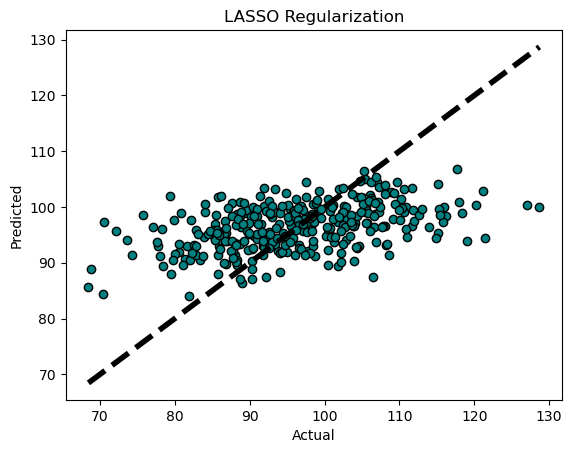

In [66]:
plt.subplots()
plt.scatter(y_test, model_LASSO_y,
           facecolor = 'teal', edgecolor = 'black')       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LASSO Regularization')
plt.show()

## B.	Compare the performance of different models and identify the best-performing model.


<div style="text-align: center;">

#### Table 1: Comparative Performance Metrics of Models 

|Model |Mean Squared Error (MSE) |R-Squared |
|:----:|:-----------------------:|:--------:|
|Multiple Linear Regression |88.50753992355224 |0.19841455097713157 |
|Random Forest Regressor |96.31935318925254 |0.12721171918498753 |
|Feature Selection Technique |94.08019673441106 |0.14750892983891728 |
|LASSO Regularization |88.18356342368963 |0.20124653176558027 |

## C.	Which model performed best according to your evaluation metrics?


#### Conclusion:
- From the comparative table above, we can conclude that **LASSO** regularization method performs the best as it has the lowest mean squared error: 80.18 and highest R-squared value: 0.20.
- Multiple Linear regression is the second best model based on these metrics, followed by feature selection technique and random forest regressor

## D.	Visualize actual Y vs. predicted Y (from the best-performed model) using a scatter plot


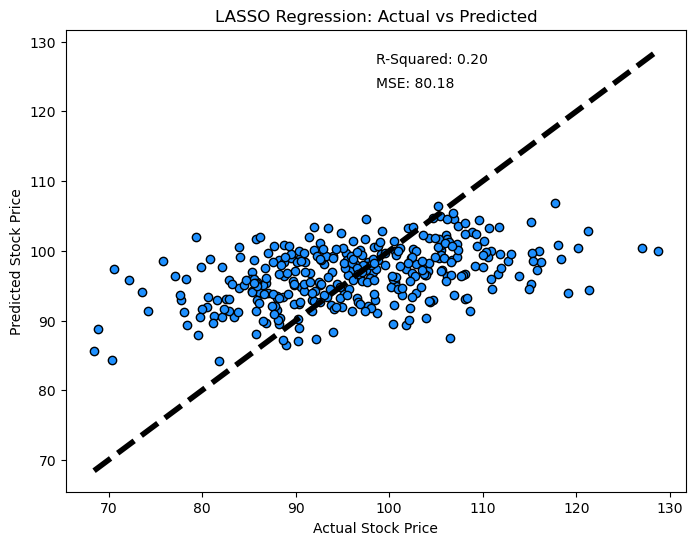

In [67]:
plt.subplots(figsize = (8, 6))
plt.scatter(y_test, model_LASSO_y,
           facecolor = 'dodgerblue', edgecolor = 'black')       # showing actual y as X-axis and predicted y as Y-axis
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('LASSO Regression: Actual vs Predicted')
plt.text(0.5, 0.95, 'R-Squared: 0.20', transform=plt.gca().transAxes, verticalalignment='top')
plt.text(0.5, 0.90, 'MSE: 80.18', transform=plt.gca().transAxes, verticalalignment='top')
plt.show()

# Task 8: Interpretation

#### A.	Interpret the coefficients of the best-performing model to understand the impact of each feature on the stock price.

- PE_Ratio, Dividend_Yield, Beta, Market_Cap, Trading_Volume, EPS, Debt_to_Equity, ROE, Current_Ratio, Sector and Exchange are **postivive coefficients**, which means that the an increase in features associated with these coefficients will increase the stock price.
- Interest_Rate, GDP_Growth, and Rating are **negative coefficients** which means that the an increase in features associated with these coefficients will decrease the stock price.
- The magnitude of the coefficent indicates the strength of the impact. For instance, a coefficient of 2.19 for Dividend_Yield has a stronger impact on the stock price than a coefficient of 0.01 for Market_Cap. I also means that one unit change in Dividend_Yield bring 2.19 units change in the stock price.
- Coefficients which are exactly zero should be intreprated as lacking target predictive capability. 

## B.	What are the most important features according to the regularized model, such as Lasso?

In [68]:
pd.DataFrame(list(zip(X.columns, np.transpose(model_LASSO.coef_)))).round(2)

,0,1
0,PE_Ratio,1.35
1,Dividend_Yield,2.19
2,Beta,1.62
3,Market_Cap,0.01
4,Trading_Volume,0.18
5,EPS,2.17
6,Debt_to_Equity,-0.76
7,ROE,1.38
8,Current_Ratio,0.26
9,Interest_Rate,-0.87


PE_Ratio, Dividend_Yield, Beta, Market_Cap, Trading_Volume, EPS, Debt_to_Equity, ROE, Current_Ratio, Interest_Rate, GDP_Growth, Sector, Rating are reported as important features by regularized model - LASSO

## C.	Discuss the practical implications of your findings.

The practical implications of the findings from the above model are: 
- EPS, Dividend_Yield, Beta, ROE and Beta have significant coefficents; this means investors should pay more attention to these factors while making investment decisions as they might higly influence or drive the stock price.
-  A negative coefficent for Interest_Rate means that stock prices are sensitive to changes in interest rate. An increase in interest rate dips the stock price. It can be an important information for protfolio managers.
- The understanding of relationship between stock price and interest rates can be crucial for financial/economic policy makers. 

## D.	Suggest areas where additional data could improve the model.

Two ways additional data could improve the model are: 
- Adding more observations could improve goodness of fit, increase model accuracy and diminish the influence of or bias introduced by outliers in the dataset
- Adding more predictors might lead to better model performace and an improve R-squared value. However, we should also be careful to as it can increase model complexity. Adding more predictors without more quality observations may also lead to inaccurate estimation of parameters, sometimes referred to as "Curse of Dimensionality"

# Task 9: Model Deployment

## A.	Deploy the best-performing model to make predictions on the scoring dataset (finance_scoring.csv).

For prediction, this data requires the exact same preprocessing that you applied to finance.csv.

In [69]:
# read the new data set for prediction 
finance_scoring = pd.read_csv("data/finance_scoring.csv")
finance_scoring.head(2)

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,GDP_Growth,Sector,Exchange,Rating
0,19.20,2.11,0.89,8079.62,777335.26,4.79,0.52,11.50,1.57,1.79,2.50,Technology,NASDAQ,BB
1,27.25,2.78,1.09,9467.94,749231.78,4.36,0.31,17.77,1.83,1.97,1.79,Healthcare,NYSE,A


In [70]:
# Impute missing values
finance_scoring[num_cols] = num_imputer.transform(finance_scoring[num_cols])
finance_scoring[cat_cols] = cat_imputer.transform(finance_scoring[cat_cols])

In [71]:
# Standardize numerical columns & Impute missing values
finance_scoring[num_cols] = scaler.transform(finance_scoring[num_cols])

# Encode categorical columns
# Note: Need to convert encoded data back to a DataFrame with column names
cat_encoded = encoder.transform(finance_scoring[cat_cols]).toarray()
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat_cols), index=finance_scoring.index)

In [72]:
# Combine numerical and encoded categorical columns back into a single DataFrame
finance_scoring_preprocessed = pd.concat([finance_scoring[num_cols], cat_encoded_df], axis=1)
finance_scoring_preprocessed.head(2)

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,...,Sector_Energy,Sector_Finance,Sector_Healthcare,Sector_Technology,Exchange_NASDAQ,Exchange_NYSE,Rating_AA,Rating_AAA,Rating_BB,Rating_BBB
0,-0.12,0.20,-0.59,-0.30,-0.33,-0.22,0.21,-1.22,0.33,-0.46,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
1,1.51,1.55,0.40,-0.16,-0.35,-0.64,-1.96,0.90,1.69,-0.09,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [73]:
# Making predictions 
predicted_stock_prices = model_LASSO.predict(finance_scoring_preprocessed)
predicted_stock_prices[:5]

array([ 93.80635046, 103.40353583,  94.91820617,  84.39682845,
        94.90452138])

In [74]:
# Create a DataFrame to display the predicted prices
predicted_stock_prices_df = finance_scoring.copy()
predicted_stock_prices_df['Predicted Stock Price'] = predicted_stock_prices

# Display the first few rows of the DataFrame with predicted prices
predicted_stock_prices_df.head()

,PE_Ratio,Dividend_Yield,Beta,Market_Cap,Trading_Volume,EPS,Debt_to_Equity,ROE,Current_Ratio,Interest_Rate,GDP_Growth,Sector,Exchange,Rating,Predicted Stock Price
0,-0.12,0.20,-0.59,-0.30,-0.33,-0.22,0.21,-1.22,0.33,-0.46,1.06,Technology,NASDAQ,BB,93.81
1,1.51,1.55,0.40,-0.16,-0.35,-0.64,-1.96,0.90,1.69,-0.09,-0.40,Healthcare,NYSE,A,103.40
2,-1.27,-0.18,-1.44,0.32,0.20,1.46,0.42,-0.97,0.59,-1.40,0.54,Finance,NYSE,A,94.92
3,-1.48,-1.49,0.10,-0.17,-0.01,-0.15,1.69,-1.68,-1.50,1.90,0.46,Healthcare,NYSE,BB,84.40
4,-0.56,1.02,-0.96,-0.33,0.06,-0.58,1.21,-0.10,0.80,0.06,0.48,Energy,AMEX,AA,94.90


<Axes: xlabel='Predicted Stock Price', ylabel='Density'>

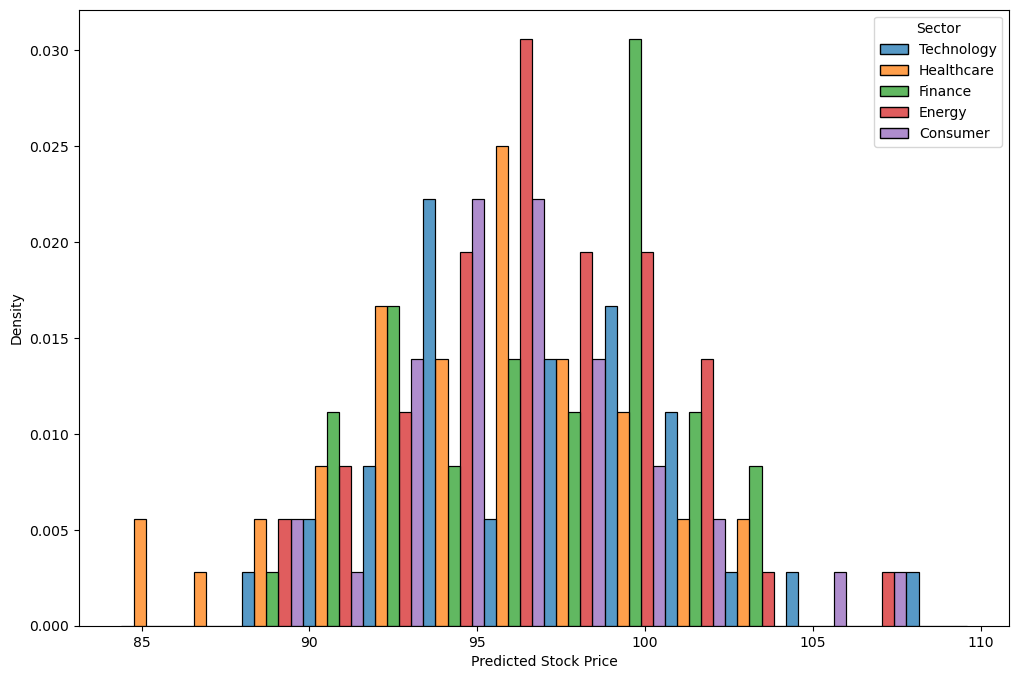

In [75]:
# Simple visualiztion
plt.subplots(figsize = (12, 8))
sns.histplot(
    predicted_stock_prices_df, x='Predicted Stock Price', hue = 'Sector', multiple = 'dodge',
    stat = "density",
)